# Part 3: SIFT Descriptors Creation and Analysis

This notebook explores how SIFT features (image regions) are encoded into descriptors (numeric vectors) that retain scale-invariance and other properties of selected keypoints.

In [23]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

Detected 585 keypoints, computed 585 descriptors
Each descriptor has 128 dimensions


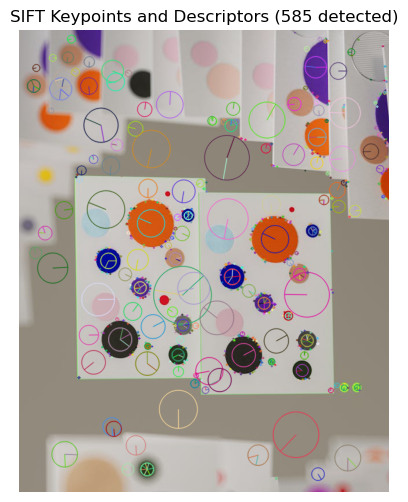

In [28]:
# Load image, detect keypoints, and compute descriptors
image = cv2.imread('Image_processing/images/example-image.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT with optimized parameters and compute descriptors
sift = cv2.SIFT_create(contrastThreshold=0.04, edgeThreshold=20)
keypoints = sift.detect(gray_image, None)
keypoints, descriptors = sift.compute(gray_image, keypoints)

print(f"Detected {len(keypoints)} keypoints, computed {descriptors.shape[0]} descriptors")
print(f"Each descriptor has {descriptors.shape[1]} dimensions")

# Display keypoints
plt.figure(figsize=(10, 6))
output_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT Keypoints and Descriptors ({len(keypoints)} detected)')
plt.axis('off')
plt.show()

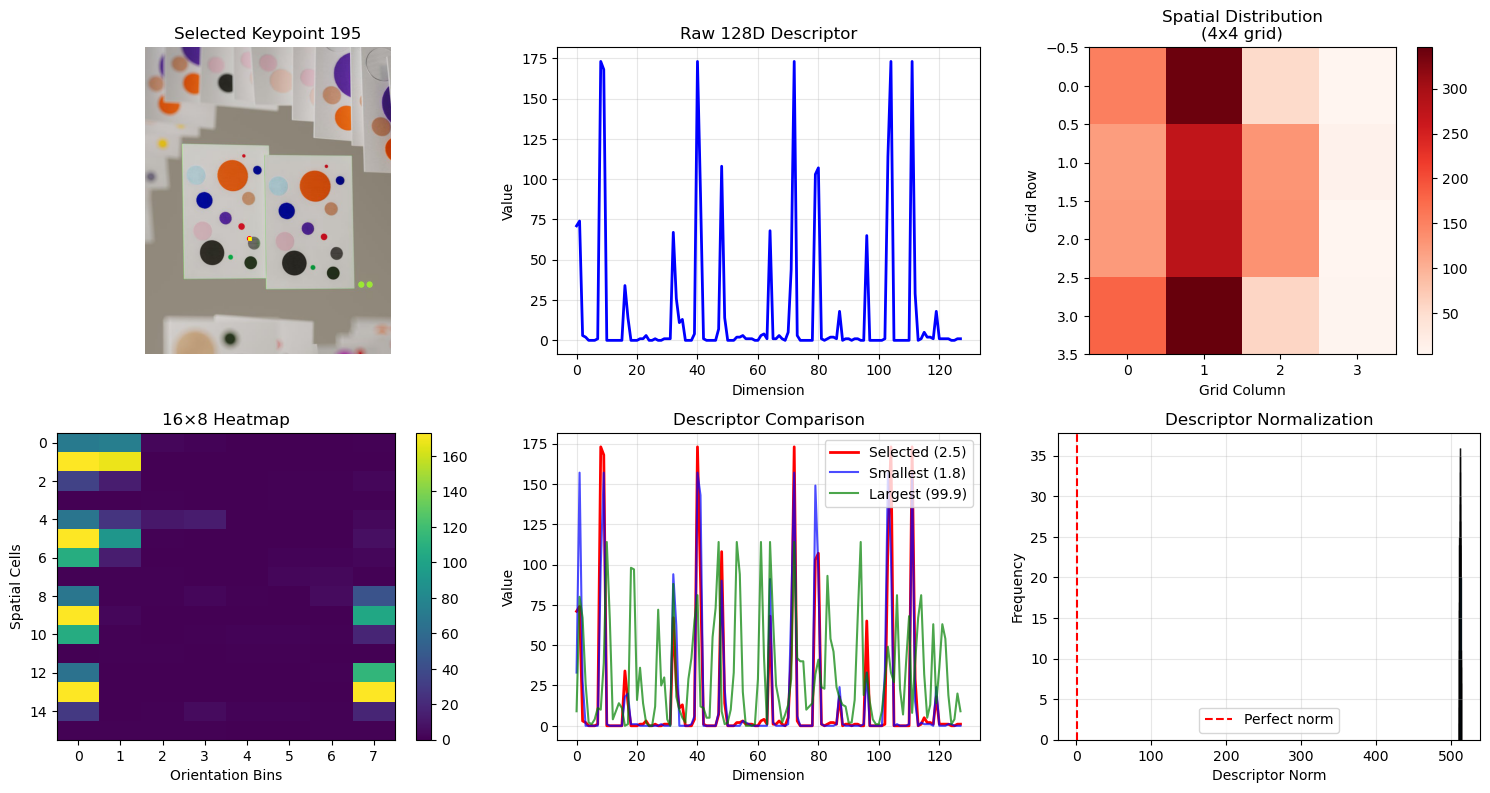

Descriptor analysis:
  Norm range: 510.641 - 513.127 (mean: 511.986)
  Sparsity: 40.6% values < 0.1

SIFT Descriptor Properties Analysis:
  Value range: 0.000000 - 217.000000
  Mean value: 20.459415
  OpenCV scales descriptors by ~512 (not unit normalized)


In [29]:
# Select keypoint for detailed analysis and visualize descriptor structure
selected_idx = len(keypoints) // 3  # Select a representative keypoint
selected_kp = keypoints[selected_idx]
selected_descriptor = descriptors[selected_idx]
patch_size = selected_kp.size * 1.5

plt.figure(figsize=(15, 8))

# Show keypoint location and patch
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
circle = plt.Circle((selected_kp.pt[0], selected_kp.pt[1]), selected_kp.size/2, 
                   fill=False, color='red', linewidth=3)
plt.gca().add_patch(circle)
rect = Rectangle((selected_kp.pt[0] - patch_size/2, selected_kp.pt[1] - patch_size/2), 
                patch_size, patch_size, fill=False, color='yellow', linewidth=2)
plt.gca().add_patch(rect)
plt.title(f'Selected Keypoint {selected_idx}')
plt.axis('off')

# Raw descriptor plot
plt.subplot(2, 3, 2)
plt.plot(selected_descriptor, 'b-', linewidth=2)
plt.title('Raw 128D Descriptor')
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# Descriptor as 4x4x8 structure
desc_grid = selected_descriptor.reshape(4, 4, 8)
spatial_magnitudes = desc_grid.sum(axis=2)

plt.subplot(2, 3, 3)
im = plt.imshow(spatial_magnitudes, cmap='Reds')
plt.colorbar(im)
plt.title('Spatial Distribution\n(4x4 grid)')
plt.xlabel('Grid Column')
plt.ylabel('Grid Row')

# Descriptor heatmap
plt.subplot(2, 3, 4)
desc_2d = selected_descriptor.reshape(16, 8)
im2 = plt.imshow(desc_2d, cmap='viridis', aspect='auto')
plt.colorbar(im2)
plt.title('16×8 Heatmap')
plt.xlabel('Orientation Bins')
plt.ylabel('Spatial Cells')

# Compare 3 different keypoints
small_idx = np.argmin([kp.size for kp in keypoints])
large_idx = np.argmax([kp.size for kp in keypoints])

plt.subplot(2, 3, 5)
plt.plot(descriptors[selected_idx], 'r-', label=f'Selected ({selected_kp.size:.1f})', linewidth=2)
plt.plot(descriptors[small_idx], 'b-', label=f'Smallest ({keypoints[small_idx].size:.1f})', alpha=0.7)
plt.plot(descriptors[large_idx], 'g-', label=f'Largest ({keypoints[large_idx].size:.1f})', alpha=0.7)
plt.title('Descriptor Comparison')
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Descriptor properties
norms = [np.linalg.norm(desc) for desc in descriptors]
plt.subplot(2, 3, 6)
plt.hist(norms, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(1.0, color='red', linestyle='--', label='Perfect norm')
plt.xlabel('Descriptor Norm')
plt.ylabel('Frequency')
plt.title('Descriptor Normalization')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Descriptor analysis:")
print(f"  Norm range: {min(norms):.3f} - {max(norms):.3f} (mean: {np.mean(norms):.3f})")
print(f"  Sparsity: {np.mean([np.sum(desc < 0.1)/128 for desc in descriptors]):.1%} values < 0.1")

# Additional comprehensive analysis
print("\nSIFT Descriptor Properties Analysis:")
all_values = descriptors.flatten()
print(f"  Value range: {all_values.min():.6f} - {all_values.max():.6f}")
print(f"  Mean value: {all_values.mean():.6f}")
print(f"  OpenCV scales descriptors by ~512 (not unit normalized)")